<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ООП" data-toc-modified-id="ООП-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ООП</a></span><ul class="toc-item"><li><span><a href="#Объекты-и-их-взаимосвязи" data-toc-modified-id="Объекты-и-их-взаимосвязи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Объекты и их взаимосвязи</a></span><ul class="toc-item"><li><span><a href="#Пример-с-авто" data-toc-modified-id="Пример-с-авто-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Пример с авто</a></span></li><li><span><a href="#Класс-и-объект" data-toc-modified-id="Класс-и-объект-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Класс и объект</a></span></li></ul></li><li><span><a href="#Классы-в-Python" data-toc-modified-id="Классы-в-Python-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Классы в Python</a></span><ul class="toc-item"><li><span><a href="#Простой-класс-со-свойствами" data-toc-modified-id="Простой-класс-со-свойствами-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Простой класс со свойствами</a></span></li><li><span><a href="#Говорим,-что-объект-умеет-делать:-методы" data-toc-modified-id="Говорим,-что-объект-умеет-делать:-методы-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Говорим, что объект умеет делать: методы</a></span></li></ul></li><li><span><a href="#Главное-откровение" data-toc-modified-id="Главное-откровение-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Главное откровение</a></span></li><li><span><a href="#Наследование" data-toc-modified-id="Наследование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Наследование</a></span></li><li><span><a href="#Инверсия-зависимостей" data-toc-modified-id="Инверсия-зависимостей-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Инверсия зависимостей</a></span></li><li><span><a href="#Перегрузка" data-toc-modified-id="Перегрузка-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Перегрузка</a></span></li><li><span><a href="#Полиморфизм" data-toc-modified-id="Полиморфизм-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Полиморфизм</a></span></li><li><span><a href="#Магические-методы" data-toc-modified-id="Магические-методы-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Магические методы</a></span></li><li><span><a href="#Множественное-наследование" data-toc-modified-id="Множественное-наследование-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Множественное наследование</a></span></li><li><span><a href="#Интерфейс" data-toc-modified-id="Интерфейс-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Интерфейс</a></span></li><li><span><a href="#SOLID-принципы" data-toc-modified-id="SOLID-принципы-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>SOLID-принципы</a></span></li></ul></li></ul></div>

# ООП
Мы уже много работали со странным синтаксисом вызова функций через точку. Например, для списка писали:
```python
sample_data = [1, 5., 3., -12]
sample_data.append(-4.5)  # вызов .append
```

При этом не было до конца ясно, почему мы вызываем именно `sample_data.append(-4.5)`, а не `append(sample_data, 4.5)`. В этом уроке мы раскроем данную загадку :)

Нам понадобится сделать небольшой шаг назад, в теорию.

## Объекты и их взаимосвязи
### Пример с авто
Представьте себе, что вы устроились программистом в Volkswagen. Вам поставили задачу написать код, описывающий марки автомобили - как свои, так и конкурентов. Марки бывают разные и могут иметь разные функциональности: каждая имеет свой цвет, тип топлива и т.п. Словом, все машины имеют разный набор характеристик. Но в то же время все автомобили описываются схожим образом, словно по трафарету.

Вы думаете, как же лучше всего это все собрать воедино. С одной стороны, для общих характеристик хочется иметь единое название: скажем, если вы обозначите цвет за `color`, то эта переменная должна так же называться и в других моделях (даже тех, которые будет писать другой программист). С другой стороны, нужно как-то делать свой код расширяемым, чтобы в будущем можно было без труда дописать код под новые марки авто  и с новыми характеристиками - в этом смысле навязать всем один строгий набор переменных будет плохой мыслью.

Вы могли бы создать что-то в духе
```python
# (цвет, производитель, марка, тип топлива)
car_1 = ('green', 'Ford', 'Mustang', 'Gasoline')
car_2 = ('Blue', 'Volkswagen', 'Golf', 'Diesel')
```
но согласитесь, тяжело сходу понять, какое число что значит. Да и легко ошибиться: кто-нибудь может сделать кортеж длины 5 и это уже будет неверная запись. Более того, если появится новая характеристика, то неясно, как ее аккуратно добавить с такую структуру.

### Класс и объект
На помощь приходят классы. Давайте посмотрим на задачу вот с такой стороны:
1. Есть некое общее описание "Машина", которая имеет характеристику: `color`, `manufacturer`, `series`, `fuel_type`.
2. По этому общему описанию клепаются конкретные объекты - например, машина с определенной маркой.

В такой постановке становится удобнее жить: мы выносим описание "Машины" в некую сущность, а конкретные чисал будут в конкретных представителях этой сущности.
Поздравляю, мы с вами пришли к концепции класса.

**Класс** - это некоторое объединение свойств объекта и действий, которые этот объект может совершать. Класс является некоторым шаблоном, по которому клепаются _объекты_. Например, по _классу_ "Машина" можно создавать конкретные _экземпляры_ (или _объекты_) машины - конкретные марки.

## Классы в Python
### Простой класс со свойствами
Давайте реализуем это в коде:

In [3]:
from dataclasses import dataclass  # упрощает создание класса в нашем случае

# Классы объявляются (т.е. создаются) через ключевое слово class
# далее идет имя. Принято писать с заглавной буквы
@dataclass
class Auto:
    color: str
    manufacturer: str
    series: str
    fuel_type: str

In [4]:
car_1 = Auto('green', 'Ford', 'Mustang', 'Gasoline')
car_2 = Auto('blue', 'Volkswagen', 'Golf', 'Diesel')
car_1

Auto(color='green', manufacturer='Ford', series='Mustang', fuel_type='Gasoline')

In [5]:
# конструктор - что делать, когда создаем объект
# имена класса пишутся в CamelCase с первой заглавной буквой
# ТоЕстьСловаСлитноБольшаяБукваНаСлово
class AutoShort:
    # функция внутри класса с таким названием будет вызываться каждый
    # раз, когда мы попросим создать новый объект.
    # Задает, что нужно принимать на вход для создания объекта
    def __init__(self, color):  # self - это сам объект, который будет создан
        self.color = color  # создаваемому объекту задаем переменную color

In [6]:
colored_car = AutoShort('red')
colored_car.color  # наш синтаксис с точкой

'red'

In [7]:
colored_car.color = 'blue'  # можно менять переменную внутри объекта
colored_car.color

'blue'

### Говорим, что объект умеет делать: методы
Объект может не только иметь свойства, но уметь что-то делать. Давайте посмотрим:

In [8]:
class AutoWithAlarm:
    # через name: type можно делать подсказки типа
    def __init__(self, color, alarm_sound: str):
        self.color = color
        self.alarm_sound = alarm_sound
    
    # эта функция уйдет в каждый объект класса, он будет уметь ее вызывать
    def alarm(self):
        # внутри этой функции можем обращаться к свойствам объекта
        print(self.alarm_sound)

In [9]:
my_new_car = AutoWithAlarm('red', 'beep-beep-beeeeeep')

In [10]:
# проверяем цвет
my_new_car.color

'red'

In [11]:
my_new_car.alarm()

beep-beep-beeeeeep


Давайте еще раз задумаемся над примером. Мы создали класс как шаблон объектов, затем начали создавать объекты по образу и подобию этого класса.

Такой подход называется ООП - _объектно-ориентированное программированием_. В ООП вы строите свой код через классы, объекты и их взаимодействие. Объектом может быть что угодно: особый список, подключение к базе данных, датафрейм и т.п.

Каждая переменная в классе называется _полем_ или _свойством_, каждая функция - _методом_.

## Главное откровение
Все в Python является объектами. Датафреймы, списки, модули (даже они), функции (и они тоже), подключения к БД - все это есть объекты некоторых классов. Именно поэтому они имели свои функции (как `[1, 2].append(3)`), которые мы вызывали через синтаксис с точкой.

## Наследование
Классы обладают интересной возможностью: вы можете создавать класс не с нуля, а позаимствовать свойства и методы из другого класса. Такой прием называется _наследованием_.

In [12]:
# Очень простое описание авто
class Auto:
    color = ''  # можно заранее создать поля, можно делать в __init__
    name = ''   # в этом примере сделаем и там, и там
    alarm_sound = ''
    
    def __init__(self, color: str, name: str, alarm_sound: str):
        self.name = name
        self.color = color
        self.alarm_sound = alarm_sound  # 

    def beep(self):
        print(self.alarm_sound)
        
# Мы захотели его расширить: добавить звуковой сигнал
# синтаксис: после имени класса в круглых скобках пишем, от кого наследуемся
class AutoWithAlarm(Auto):
    # добавляем новый функционал
    def alarm(self):
        print('piy-piy')

In [13]:
car_sound = AutoWithAlarm('red', 'Polo', 'bepe')
car_sound.alarm()

piy-piy


In [14]:
car_sound.beep()

bepe


Класс `AutoWithAlarm` зовется _дочерним_, `Auto` для него будет _родительским_ классом (или _базовым_ классом).

При наследовании надо соблюдать несколько простых правил:
1. Наследуемый класс (`AutoWithAlarm`) по логике должен расширять базовый класс, а не перечеркивать его поведение и делать по-своему.
2. Код должен продолжать работать, если заменить в нем базовый класс на какой-то из его наследников ([принцип Барбары Лисков](https://ru.wikipedia.org/wiki/Принцип_подстановки_Барбары_Лисков)).

## Инверсия зависимостей
Еще одна вещь про наследование. Если у вас есть много слабо связанных сущностей, то стоит их общие черты выделить в некий "абстрактный" класс, а затем каждую сущность сделать наследником.

In [15]:
# Общий, несколько абстрактный, класс - от него будут наследоваться детали
class GeneralAuto:
    color = ''
    name = ''

# добавляем специфичную функцию, не свойственную всем автомобилям
class AutoTransmissionCar(GeneralAuto):
    def set_position(self, position):
        if position == 'D':
            print(f'going forward')
        # дальше сложный код по выстановке автоматической трансмиссии

class ManualTransmissionCar(GeneralAuto):
    def set_transmission(self, step):
        if step == 'R':
            print('going backwards')
        # сложный код по переключению передачи

Это выльется в такое отношение

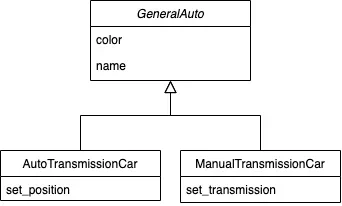

## Перегрузка

Класс-наследник может переопределить поведение родительской функции:

In [16]:
class Auto:
    color = ''
    name = ''
    alarm_sound = ''
    
    def __init__(self, color: str, name: str, alarm_sound: str):
        self.name = name
        self.color = color
        self.alarm_sound = alarm_sound  # 

    def beep(self):
        print(self.alarm_sound)
        

class AutoWithCustomBeep(Auto):
    # берем и нагло меняем поведение - переопределяем метод родителя
    def beep(self):
        # кстати, можно использовать родительскую версию
        # super().beep()
        print('beep broke, sorry')

In [17]:
car_broken = AutoWithCustomBeep('red', 'Volvo', 'beep123')
car_broken.beep()

beep broke, sorry


Такое переопределение называется _перегрузкой_ (_override_) метода. Оно часто применяется, когда в наследнике необходимо поменять некоторое поведение родителя.

Кстати, если вы переопределите свойства, то все обращения к ней тоже переопределятся!

## Полиморфизм
Для Python особо не актуален, поскольку в Python динамическая типизация. Расскажем коротко.

Полиморфизм - это возможность создавать _один и тот же метод_ в классе, работающий с данными разного _типа_.

Например
```python
class NumberPrinter:
    def print_number(self, num: int):
        print(f'integer, {num}')
    def print_number(self, num: float):
        print(f'float, {num}')
```
Достигнется разное поведение на разных типах.

В Python этот пример **не будет** работать, он только лишь возьмет последнюю реализацию функции.

[Подробнее про полиморфизм для заинтересованных](https://habr.com/ru/post/552922/).

In [18]:
# В других языках этот пример бы сработал, но не в Python
# из-за дин. типизации
class NumberPrinter:
    # для int
    def print_number(self, num: int):
        print(f'integer, {num}')
        
    # для float
    def print_number(self, num: float):
        print(f'float, {num}')

In [19]:
NumberPrinter().print_number(5.5)
NumberPrinter().print_number(5)

float, 5.5
float, 5


## Магические методы
В классе можно объявить методы с особыми названиями, которые дадут объектам класса особую функциональность. Такие методы называются _magic methods_.

In [20]:
class Vector3D:
    def __init__(self, x, y, z):
        self.x, self.y, self.z = x, y, z
        
    # Добавит возможность складывать объекты
    def __add__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)

In [21]:
vec_1 = Vector3D(1, 3, 5)
vec_2 = Vector3D(-5, -3, 1)
sum_vec = vec_1 + vec_2
print(sum_vec)   # некрасивый вывод

In [22]:
sum_vec.z

6

In [23]:
class Vector3D:
    def __init__(self, x, y, z):
        self.x, self.y, self.z = x, y, z

    def __add__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)
    
    # добавит красивую печать
    def __str__(self):
        return f'({self.x}, {self.y}, {self.z})'

In [24]:
vec_1 = Vector3D(1, 3, 5)
vec_2 = Vector3D(-5, -3, 1)
print(vec_1 + vec_2)

(-4, 0, 6)


In [25]:
# еще один трюк: можно добавить возможность вызывать объект как функцию!
class TriangleCalculator:
    def __init__(self, a):
        self.a = a
        
    # дает возможность вызывать объект, как  функцию
    def __call__(self, b):
        return (self.a ** 2 + b ** 2) ** 0.5

In [26]:
calc = TriangleCalculator(a=5)
# можно забирать поля
calc.a

5

In [27]:
# а можно использовать как функцию
calc(4)

6.4031242374328485

Такие волшебные методы часто используются при разработке библиотек. Более подробно про них можно почитать [здесь](https://www.tutorialsteacher.com/python/magic-methods-in-python).

## Множественное наследование
В Python можно наследоваться не только от одного класса, а от нескольких. Для этого надо перечислять родителей через запятую:

In [28]:
class Printable:
    # обращаемся к переменной "a", хотя не объявили
    def __str__(self):
        print('__str__ is called')
        return f'{self.a}'
        
class Divisable:
    def __truediv__(self, b: int):
        print('__truediv__ is called')
        return self.a / b


class NumberKeeper(Printable, Divisable):
    def __init__(self, a):
        # Вот тут появится a
        self.a = a

In [29]:
keeper = NumberKeeper(5)
keeper / 2

__truediv__ is called


2.5

In [30]:
print(keeper)

__str__ is called
5


## Интерфейс
Классы позволяют проводить еще один трюк. Допустим, вы разрабатываете библиотеку для подключения к различным типам СУБД: к PostgreSQL, к ClickHouse, к MySQL и т.п.

Как главный разработчик, вы принимаете решение писать по классу на каждый тип СУБД и при этом обязать всех программистов реализовать функцию `.connect()` в этих классах. С помощью ООП можно наложить это обязательство не только словами, но и кодом:

In [31]:
import time

# Создаем класс с функцией, которую требуется реализовать
class Connectable:
    def connect(conn_uri: str):
        raise NotImplemented("you should override this method")

# И наследуемся от нее во всех классах
class PostgresqlConnection(Connectable):
    # теперь мы получили в наследство неисправную функцию
    # надо ее переопределить на исправную версию
    def connect(conn_uri: str):
        print('connecting to postgres')
        time.sleep(3)  # имитируем подключение к postgres :)
        print('connection done')

Класс `Connectable` в этом случае будет называться _интерфейсом_. Грубо говоря, интерфейс - это класс, который ничего не делает по существу и только дает обязательства на реализацию того или иного метода.

Интерфейсы используются, чтобы напоминать другим разработчикам, какие методы они должны реализовать для нормальной работы класса в остальной системе :)

## SOLID-принципы
Пять принципов, по которым стоит строить классы. Не обязательно их всех запомнить, но лучше держать в голове и потихоньку к ним приближаться :)
1. Принцип единственной ответственности (single responsibility principle)
2. Программные сущности должны быть открыты для расширения, но закрыты для модификации».
3. Объекты в программе должны быть заменяемыми на экземпляры их подтипов без изменения правильности выполнения программы
4. Много интерфейсов, специально предназначенных для клиентов, лучше, чем один интерфейс общего назначения.
5. Зависимость на Абстракциях.